In this notebook, we'll use the open-sourced library lifelines to perform survival analysis on customer churn data. We will be using this analysis to infer the timing and factors that influence when customers leave

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import utils
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import os
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler
from lifelines.utils import concordance_index
from imblearn.over_sampling import SMOTE

In [ ]:
# # Read data from Cons_ID journey
# data=pd.read_csv(r"C:\Users\nguyenta\OneDrive - Wolverine World Wide\Tam Nguyen\Project\SFMC\SFMC_EMAIL_ATTR_CLICKERS_SHOPPERS_TRANS.csv")
# # data=pd.read_csv(r"C:\Users\nguyenta\Downloads\sample.csv")
# data.head()

In [ ]:
# def get_decile_grp(row):
#     if row['LIFE_STAGE'] == 'Lapsed':
#         if row['LT_DECILE'] in [1,2,3]:
#             return 'Best'
#         elif row['LT_DECILE'] in [4,5,6]:
#             return 'Better'
#         else:
#             return 'Good'
#     elif row['LIFE_STAGE'] == 'New':
#         if row['TY_DECILE'] in [1,2,3]:
#             return 'Best'
#         elif row['TY_DECILE'] in [4,5,6]:
#             return 'Better'
#         else:
#             return 'Good'
#     elif row['LIFE_STAGE'] in ['Reactivated','Retained']:
#         score = row['LT_DECILE']*0.5 + row['TY_DECILE']*0.5
#         if score <= 3:
#             return 'Best'
#         elif score <= 6:
#             return 'Better'
#         else:
#             return 'Good'
#     elif row['LIFE_STAGE'] == 'Sign Up - Not Activated':
#         return 'Good'
# # Định nghĩa FREQ_GRP
# def get_freq_grp(row):
#     if row['CUST_ACTIVITY'] == 'Active':
#         if row['TY_NODE'] in ['1111','0111','1011','0011','1101','0101','1001']:
#             return 'High'
#         elif row['TY_NODE'] in ['0001','1110','0110','1010','0010']:
#             return 'Medium'
#         else:
#             return 'Low'
#     else:
#         if row['TY_NODE'] in ['1110','0110','1010','0010']:
#             return 'High'
#         elif row['TY_NODE'] in ['1100','0100','1000']:
#             return 'Medium'
#         else:
#             return 'Low'
# # Định nghĩa SEGMENT
# def get_segment(row):
#     if row['LIFE_STAGE'] == 'New':
#         if row['FREQ_GRP'] == 'High' and row['DECILE_GRP'] == 'Best':
#             return 'High-Value New'
#         elif row['DECILE_GRP'] == 'Best':
#             return 'Best New'
#         elif row['DECILE_GRP'] == 'Better':
#             return 'Growing New'
#         else:
#             return 'Low-Value New'
#     elif row['LIFE_STAGE'] == 'Reactivated':
#         if row['FREQ_GRP'] == 'High' and row['DECILE_GRP'] == 'Best':
#             return 'High-Value Reactivated'
#         elif row['DECILE_GRP'] == 'Best':
#             return 'Best Reactivated'
#         elif row['DECILE_GRP'] == 'Better':
#             return 'Growing Reactivated'
#         else:
#             return 'Low-Value Reactivated'
#     elif row['LIFE_STAGE'] == 'Retained':
#         if row['FREQ_GRP'] == 'High' and row['DECILE_GRP'] == 'Best':
#             return 'Loyal Champions'
#         elif row['DECILE_GRP'] == 'Best':
#             return 'Loyal Best'
#         elif row['DECILE_GRP'] == 'Better':
#             return 'Retained Growth'
#         else:
#             return 'Retained Low'
#     elif row['LIFE_STAGE'] == 'Lapsed':
#         if row['DECILE_GRP'] == 'Best':
#             return "At Risk High Spenders"
#         elif row['DECILE_GRP'] == "Better":
#             return "At Risk Mid Spenders"
#         else:
#             return "At Risk Low"
#     elif row["LIFE_STAGE"] == "Sign Up - Not Activated":
#         return "Dormant Sign-Ups"

# # Định nghĩa CLASSIC_RFM_SEGMENT
# def get_classic_rfm_segment(row):
#     if row["LIFE_STAGE"] == "New":
#         if row["FREQ_GRP"] == "High" and row["DECILE_GRP"] == "Best":
#             return "Champions"
#         elif row["DECILE_GRP"] == "Best":
#             return "Potential Loyalist"
#         elif row["DECILE_GRP"] == "Better":
#             return "Promising"
#         else:
#             return "Recent Customers"
#     elif row["LIFE_STAGE"] == "Reactivated":
#         if row["FREQ_GRP"] == "High" and row["DECILE_GRP"] == "Best":
#             return "Champions"
#         elif row["DECILE_GRP"] == "Best":
#             return "Potential Loyalist"
#         elif row["DECILE_GRP"] == "Better":
#             return "Customers Needing Attention"
#         else:
#             return "About To Sleep"
#     elif row["LIFE_STAGE"] == "Retained":
#         if row["FREQ_GRP"] == "High" and row["DECILE_GRP"] == "Best":
#             return "Champions"
#         elif row["DECILE_GRP"] == "Best":
#             return "Loyal Customers"
#         elif row["DECILE_GRP"] == "Better":
#             return "Customers Needing Attention"
#         else:
#             return "About To Sleep"
#     elif row["LIFE_STAGE"] == "Lapsed":
#         if row["DECILE_GRP"] == "Best":
#             return "Can't Lose Them"
#         elif row["DECILE_GRP"] == "Better":
#             return "At Risk"
#         else:
#             return "Hibernating"
#     elif row["LIFE_STAGE"] == "Sign Up - Not Activated":
#         return "Lost"

In [ ]:
# def convert_to_4_char_string(number):
#     return f"{number:04d}"
# # Áp dụng hàm cho từng giá trị trong cột 'numbers'
# data['TY_NODE'] = data['TY_NODE'].apply(convert_to_4_char_string)

In [ ]:
# data.tail(3)

In [ ]:
# data['FREQ_GRP'] = data.apply(get_freq_grp, axis=1)

In [ ]:
# data['DECILE_GRP'] = data.apply(get_decile_grp, axis=1)

In [ ]:
# data["CLASSIC_RFM_SEGMENT"] = data.apply(get_classic_rfm_segment, axis=1)

In [ ]:
# data["SEGMENT"] = data.apply(get_segment, axis=1)

In [ ]:
# data.head()

In [ ]:
# # def categorize_recency(value):
# #     if value=='New':
# #         return 5
# #     elif value=='Reactivated':
# #         return 4
# #     elif value=='Retained':
# #         return 3
# #     elif value=='Lapsed':
# #         return 2
# #     else:
# #         return 1
# # PREPROCESSING
# # Tính số liệu Recency, Frequency and Monetary
# data=data[data["LIFE_STAGE"]!= 'Sign Up - Not Activated']
# data["LAST_VISIT_DT"]=pd.to_datetime(data['LAST_VISIT_DT'])
# # data['recency']=data['LIFE_STAGE'].apply(categorize_recency)
# data['recency']=data['LIFE_STAGE']
# data['frequency']=data["TY_NODE_NM"].apply(lambda x: x[2:]).astype(int)
# data['monetary']=data["TY_DECILE"]
# data['TY_NET_SALES']=data['TY_NET_SALES'].apply(lambda x: 0 if x<0 else x)
# data['TY_UNIT_CNT']=data['TY_UNIT_CNT'].apply(lambda x: 0 if x<0 else x)
# data['FIRST_PURCHASE_DT']=pd.to_datetime(data['FIRST_PURCHASE_DT'])
# data['LAST_VISIT_DT']=pd.to_datetime(data['LAST_VISIT_DT'])

In [2]:
data=pd.read_csv(r"C:\Users\nguyenta\OneDrive - Wolverine World Wide\Tam Nguyen\Project\SFMC\output.csv")

In [3]:
data.shape

(17208703, 96)

In [4]:
data.head()

,Unnamed: 0,CONS_ID,IP_ENROLL_DT,FIRST_PURCHASE_DT,EMAIL_SUBS,EMAIL_OPT_IN_DT,SMS_SUBS,SMS_OPT_IN_DT,VIP_STATUS,VIP_QUALIFYING_DT,...,TY_NODE_NM,LY_NODE,LY_NODE_NM,FREQ_GRP,DECILE_GRP,CLASSIC_RFM_SEGMENT,SEGMENT,recency,frequency,monetary
0,0,{3016988A-2D6C-4EDC-A5A8-3CD0DD339E0B},2019-03-27,2019-03-27,NaN,NaN,NaN,NaN,No,NaN,...,CA09,1.0,CA08,High,Best,Can't Lose Them,At Risk High Spenders,Lapsed,9,NaN
1,1,{869207AC-A3EC-4115-A3EE-7DA1E6410E0B},2019-10-09,2019-10-09,NaN,NaN,NaN,NaN,No,NaN,...,CA15,100.0,CA14,Medium,Better,At Risk,At Risk Mid Spenders,Lapsed,15,NaN
2,2,{B2F0D6AE-1CCA-4FE4-A387-1EDFA9C5FC63},2024-02-25,2024-02-25,Yes,2024-02-26,NaN,NaN,No,NaN,...,CA15,NaN,NaN,Low,Good,Recent Customers,Low-Value New,New,15,8.0
3,3,{AF0B9F93-49BE-401D-819D-A7E87AA7928A},2019-06-14,2019-06-14,Yes,2018-09-24,NaN,NaN,No,NaN,...,CA16,0.0,CA16,Low,Good,Hibernating,At Risk Low,Lapsed,16,NaN
4,4,{AB9E014C-CFF9-457A-A303-AF34822B4724},2024-04-14,2024-04-14,NaN,NaN,NaN,NaN,No,NaN,...,CA15,NaN,NaN,Low,Better,Promising,Growing New,New,15,5.0


## CALCULATE TENURE BASE ON CHURN STATUS

In [5]:
data.columns

Index(['Unnamed: 0', 'CONS_ID', 'IP_ENROLL_DT', 'FIRST_PURCHASE_DT',
       'EMAIL_SUBS', 'EMAIL_OPT_IN_DT', 'SMS_SUBS', 'SMS_OPT_IN_DT',
       'VIP_STATUS', 'VIP_QUALIFYING_DT', 'VIP_EXPIRATION_DT', 'IP_BOSS',
       'IP_BOSS_DT', 'CC_HOLDER', 'CC_HOLDER_DT', 'CAL_YEAR_NBR',
       'CAL_WEEK_NBR', 'FISCAL_YEAR', 'FISCAL_QUARTER', 'FISCAL_PERIOD_NBR',
       'FISCAL_PERIOD', 'FISCAL_WEEK_NBR', 'WEEK_STRT_DT', 'WEEK_END_DT',
       'LY_WEEK_STRT_DT', 'LY_WEEK_END_DT', 'LAST_VISIT_DT', 'RECENCY',
       'DAYS_SINCE_LAST_VISIT', 'WK_NET_SALES', 'WK_TRANS_CNT',
       'WK_POS_TRANS_CNT', 'WK_UNIT_CNT', 'WK_VISITS', 'PR_NET_SALES',
       'PR_TRANS_CNT', 'PR_POS_TRANS_CNT', 'PR_UNIT_CNT', 'PR_VISITS',
       'QR_NET_SALES', 'QR_TRANS_CNT', 'QR_POS_TRANS_CNT', 'QR_UNIT_CNT',
       'QR_VISITS', 'LT_NET_SALES', 'LT_TRANS_CNT', 'LT_UNIT_CNT',
       'LT_POS_TRANS_CNT', 'LT_VISITS', 'FY_NET_SALES', 'FY_TRANS_CNT',
       'FY_UNIT_CNT', 'FY_POS_TRANS_CNT', 'FY_VISITS', 'CAL_NET_SALES',
       '

In [6]:
data['churn']=data['SEGMENT'].apply(lambda x: 1 if x=='At Risk Low' else 0)

In [7]:
data['monetary']=data['monetary'].fillna(0)
current_date = datetime.strptime('2025-01-25', '%Y-%m-%d')
# Gap between first purchase to last purchase for Churn and Gap between first purchase to current date for Not Churn
# Tính toán "tenure" dựa trên trạng thái churn
data['FIRST_PURCHASE_DT']=pd.to_datetime(data['FIRST_PURCHASE_DT'])
data['LAST_VISIT_DT']=pd.to_datetime(data['LAST_VISIT_DT'])
data['gap_1']=1+(data['LAST_VISIT_DT']-data['FIRST_PURCHASE_DT']).dt.days
data['gap_2']=1+(current_date-data['FIRST_PURCHASE_DT']).dt.days

In [8]:
# data['tenure'] = data.apply(lambda row: row['gap_2'] if row['churn'] == 0 else row['gap_1'], axis=1)
data['tenure'] = np.where(data['churn'] == 0, data['gap_2'], data['gap_1'])

In [9]:
data['LT_NET_SALES']=data['LT_NET_SALES'].apply(lambda x: 0 if x<0 else x)
data['LT_UNIT_CNT']=data['LT_UNIT_CNT'].apply(lambda x: 0 if x<0 else x)

In [10]:
df=data[['CONS_ID','LIFE_STAGE','FREQ_GRP', 'DECILE_GRP','CLASSIC_RFM_SEGMENT', 'SEGMENT','LT_NET_SALES','TY_NET_SALES','LT_TRANS_CNT','LT_POS_TRANS_CNT','LT_UNIT_CNT','LT_VISITS','TY_TRANS_CNT','TY_POS_TRANS_CNT','TY_UNIT_CNT','TY_VISITS','DAYS_SINCE_LAST_VISIT','recency','frequency','monetary','tenure','churn']]
df=df.rename(columns={
    'CONS_ID':'Cons_ID',
    'LIFE_STAGE':'life_stage',
    'TY_NET_SALES':'TY_net_sales',
    'TY_TRANS_CNT':'TY_trans_cnt',
    'TY_POS_TRANS_CNT':'TY_pos_trans_cnt',
    'TY_UNIT_CNT':'TY_unit_cnt',
    'TY_VISITS':'TY_visits',
    'LT_NET_SALES':'LT_net_sales',
    'LT_TRANS_CNT':'LT_trans_cnt',
    'LT_POS_TRANS_CNT':'LT_pos_trans_cnt',
    'LT_UNIT_CNT':'LT_unit_cnt',
    'LT_VISITS':'LT_visits',
    'DAYS_SINCE_LAST_VISIT':'Days_since_last_visit'
})
df.head(100)

,Cons_ID,life_stage,FREQ_GRP,DECILE_GRP,CLASSIC_RFM_SEGMENT,SEGMENT,LT_net_sales,TY_net_sales,LT_trans_cnt,LT_pos_trans_cnt,...,TY_trans_cnt,TY_pos_trans_cnt,TY_unit_cnt,TY_visits,Days_since_last_visit,recency,frequency,monetary,tenure,churn
0,{3016988A-2D6C-4EDC-A5A8-3CD0DD339E0B},Lapsed,High,Best,Can't Lose Them,At Risk High Spenders,848.73,0.00,9,8,...,0,0,0.0,0,431.0,Lapsed,9,0.0,2132,0
1,{869207AC-A3EC-4115-A3EE-7DA1E6410E0B},Lapsed,Medium,Better,At Risk,At Risk Mid Spenders,137.87,0.00,2,2,...,0,0,0.0,0,1260.0,Lapsed,15,0.0,1936,0
2,{B2F0D6AE-1CCA-4FE4-A387-1EDFA9C5FC63},New,Low,Good,Recent Customers,Low-Value New,39.94,39.94,1,1,...,1,1,6.0,1,335.0,New,15,8.0,336,0
3,{AF0B9F93-49BE-401D-819D-A7E87AA7928A},Lapsed,Low,Good,Hibernating,At Risk Low,118.36,0.00,4,4,...,0,0,0.0,0,1874.0,Lapsed,16,0.0,179,1
4,{AB9E014C-CFF9-457A-A303-AF34822B4724},New,Low,Better,Promising,Growing New,101.89,101.89,1,1,...,1,1,11.0,1,286.0,New,15,5.0,287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,{5449021B-06C4-41FC-8C51-305CDDFAB1E3},Lapsed,High,Good,Hibernating,At Risk Low,107.44,0.00,3,2,...,0,0,0.0,0,440.0,Lapsed,12,0.0,2,1
96,{D816CEA1-6827-4968-A2F1-99939D9C78CD},Lapsed,High,Best,Can't Lose Them,At Risk High Spenders,443.96,0.00,5,4,...,0,0,0.0,0,726.0,Lapsed,10,0.0,801,0
97,{78CB9A6C-ED12-4AF2-B05C-A67D7C7E0CEE},Lapsed,Medium,Good,Hibernating,At Risk Low,51.46,0.00,2,2,...,0,0,0.0,0,933.0,Lapsed,14,0.0,1,1
98,{F37B3825-0937-4864-B82A-44C1C0B122C0},Reactivated,High,Better,Customers Needing Attention,Growing Reactivated,123.38,106.91,3,3,...,2,2,9.0,2,82.0,Reactivated,6,5.0,1814,0


In [11]:
df['tenure'].value_counts()

tenure
1       3180128
2         65430
3         40501
8         33808
4         30298
         ...   
2107         46
2665         41
2224         23
2257          8
2670          5
Name: count, Length: 2664, dtype: int64

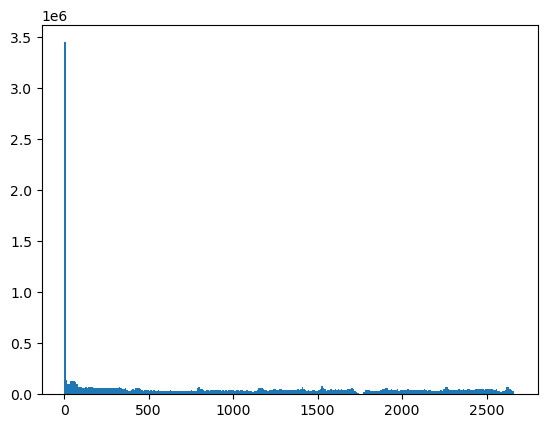

In [12]:
plt.hist(df['tenure'],bins=300)
plt.show()

In [13]:
df.columns

Index(['Cons_ID', 'life_stage', 'FREQ_GRP', 'DECILE_GRP',
       'CLASSIC_RFM_SEGMENT', 'SEGMENT', 'LT_net_sales', 'TY_net_sales',
       'LT_trans_cnt', 'LT_pos_trans_cnt', 'LT_unit_cnt', 'LT_visits',
       'TY_trans_cnt', 'TY_pos_trans_cnt', 'TY_unit_cnt', 'TY_visits',
       'Days_since_last_visit', 'recency', 'frequency', 'monetary', 'tenure',
       'churn'],
      dtype='object')

## REDUCE RIGHT CENSORING DATA BY REMOVING DATA WITH TENURE==1 && CHURN==0

In [14]:
df=df[~((df['tenure']<=1) & (df['churn'] == 0))]
# Mean and Median of Churn
events=df[['tenure','churn']]
naive_stat_1=(events.query("churn==1")["tenure"].apply(["median","mean"]))
print(f"Biased method 1 (removing censored points):\n"
     f"median: {naive_stat_1["median"]:.1f} days, "
     f"mean: {naive_stat_1["mean"]:.1f} days"
)
max_duration=events["tenure"].max()
naive_stat_2=(pd.Series(np.where(events['churn'],events['tenure'],max_duration)).apply(['mean','median']))
print(f"Biased method 2 (censored events moved to the end of the window):\n"
     f"median: {naive_stat_2["median"]:.1f} days, "
     f"mean: {naive_stat_2["mean"]:.1f} days"
)

Biased method 1 (removing censored points):
median: 1.0 days, mean: 148.2 days
Biased method 2 (censored events moved to the end of the window):
median: 2670.0 days, mean: 1956.7 days


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LT_net_sales,17201495.0,448.319087,1081.555418,0.0,69.03,194.27,502.92,825249.23
TY_net_sales,17201495.0,79.224253,338.843130,0.0,0.00,0.00,73.42,397800.40
LT_trans_cnt,17201495.0,6.321803,15.438656,1.0,1.00,3.00,7.00,14183.00
LT_pos_trans_cnt,17201495.0,5.553110,13.499526,0.0,1.00,3.00,6.00,12389.00
LT_unit_cnt,17201495.0,30.868491,71.335920,0.0,5.00,13.00,34.00,48251.00
LT_visits,17201495.0,5.467016,8.914684,1.0,1.00,3.00,6.00,3408.00
TY_trans_cnt,17201495.0,1.153136,5.271127,0.0,0.00,0.00,1.00,5843.00
TY_pos_trans_cnt,17201495.0,1.025669,4.690677,0.0,0.00,0.00,1.00,5210.00
TY_unit_cnt,17201495.0,5.814918,22.745078,0.0,0.00,0.00,6.00,22565.00
TY_visits,17201495.0,0.993478,2.229790,0.0,0.00,0.00,1.00,337.00


In [16]:
df.isnull().sum()

Cons_ID                  0
life_stage               0
FREQ_GRP                 0
DECILE_GRP               0
CLASSIC_RFM_SEGMENT      0
SEGMENT                  0
LT_net_sales             0
TY_net_sales             0
LT_trans_cnt             0
LT_pos_trans_cnt         0
LT_unit_cnt              0
LT_visits                0
TY_trans_cnt             0
TY_pos_trans_cnt         0
TY_unit_cnt              0
TY_visits                0
Days_since_last_visit    0
recency                  0
frequency                0
monetary                 0
tenure                   0
churn                    0
dtype: int64

In [17]:
df['churn'].value_counts()

churn
0    12336258
1     4865237
Name: count, dtype: int64

In [18]:
df.columns

Index(['Cons_ID', 'life_stage', 'FREQ_GRP', 'DECILE_GRP',
       'CLASSIC_RFM_SEGMENT', 'SEGMENT', 'LT_net_sales', 'TY_net_sales',
       'LT_trans_cnt', 'LT_pos_trans_cnt', 'LT_unit_cnt', 'LT_visits',
       'TY_trans_cnt', 'TY_pos_trans_cnt', 'TY_unit_cnt', 'TY_visits',
       'Days_since_last_visit', 'recency', 'frequency', 'monetary', 'tenure',
       'churn'],
      dtype='object')

# CHECK CORRELATION AMONG COVARIATES

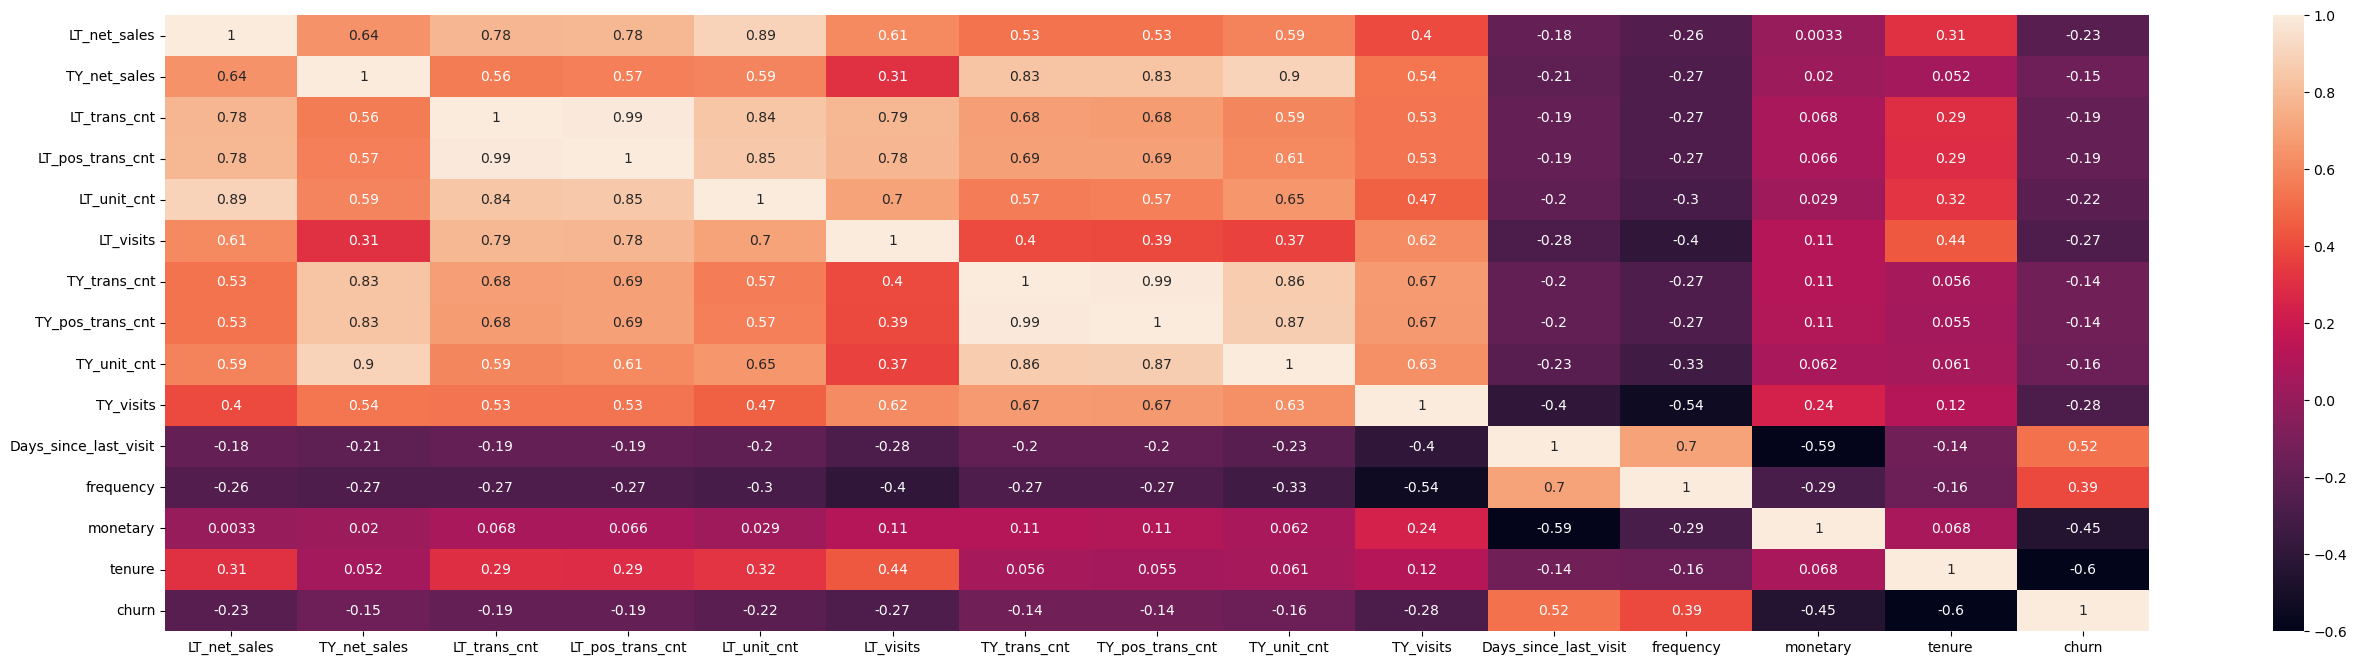

In [21]:
plt.figure(figsize=(32, 8))
sns.heatmap(df[['LT_net_sales', 'TY_net_sales','LT_trans_cnt', 'LT_pos_trans_cnt', 'LT_unit_cnt', 'LT_visits','TY_trans_cnt', 'TY_pos_trans_cnt', 'TY_unit_cnt', 'TY_visits','Days_since_last_visit','frequency', 'monetary', 'tenure','churn']].corr(),annot=True)
plt.show()

# Biến có tương quan >0.8 hoặc<-0.8 với nhau thì cần loại 1 trong 2 biến để tránh đa cộng tuyến làm giảm độ ổn định của mô hình
LT_trans_cnt,LT_unit_cnt,LT_pos_trans_cnt: tất cả tương quan >0.85 với nhau: chọn 1 trong 3
TY_trans_cnt,TY_pos_trans_cnt, TY_unit_cnt: cũng tương tự, chọn 1 đại diện
Days_since_last_visit, frequency: tương quan 0.7, có thể giữ cả 2 nhưng cân nhắc nếu VIF cao sau này
Ưu tiên chọn biến có tương quan với churn, tenure:
# Tương quan với Churn: 
    +monetary: -0.45
    +frequency: -0.39
    +Days_since_last_visit: 0.52
# Tương quan với Tenure: 
    +LT_visit: 0.44
    +LT_net_sales,LT_trans_cnt,LT_unit_cnt: ~0.3
# ==> Chọn Days_since_last_visit: tương quan cao với churn (0.52)
    frequency: tương quan cao với churn
    monetary: thể hiện mức chi tiêu
    LT_net_sales hoặc LT_unit_cnt
Chọn Days_since_last_visit, frequency, moentary,LT_net_sales,LT_unit_cnt

## 1. Kaplan-Meier Estimate (Non-parametric Model)

The most common non-parametric technique for modeling the survival function is Kaplan-Meier estimate. Another way to think about survival analysis is non-negative regression and density estimation for a single random variable (first event time) in the presence of censoring. Kaplan-Meier is a non-parametric density estimate (empirical survival function) in the presence of censoring. The advantage of this model is that it’s very flexible, and model complexity grows with the number of observations. However, there are two disadvantages:

1. It isn’t easy to incorporate covariates, meaning that it’s difficult to describe how individuals differ in their survival functions based on the profiles. The main way to do it is to fit a different model on different subpopulations and compare them. However, as the number of characteristics and values of those characteristics grows, this is hard to scale.
2. The survival functions aren’t smooth.  In particular they are piecewise constant.  They approach a smooth estimator as the sample size grows, but for small samples they are far from smooth. It’s not clear that it’s realistic that the death probability ‘jumps’ in a small interval.  Furthermore, if you don’t have any death observations in the interval [0,t), then it will assign survival probability 1 to that period, which may not be desirable.  There are ways to smooth the survival function (kernel smoothing), but the interpretation of the smoothing can be a bit tricky.


The key idea of the Kaplan-Meier estimator is to break the estimation of the survival function $S(t)$ into smaller steps depending on the observed event times. For each interval the probability of surviving until the end of this interval is calculated, given the following formula:

$\Huge\hat{S(t)} = \prod_{i: t_i <= t}{\frac{n_i - d_i}{n_i}}$

where $n_i$ is a number of individuals who are at risk at time point $t_i$ and $d_i$ is a number of subjects that experienced the event at time $t_i$. [8]

The Kaplan-Meier curve will be estimating the survival probability of a customer from the time they start using the service to time T in days until they churn.

inf


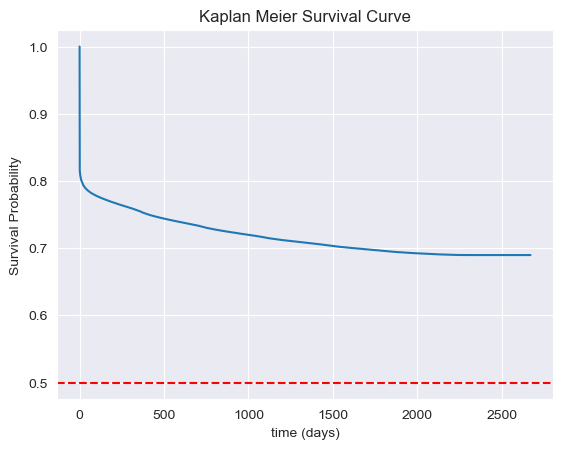

In [22]:
kmf = KaplanMeierFitter()
T=df['tenure']
C=df['churn'].astype(float)
kmf.fit(T,C)
print(kmf.median_survival_time_)
sns.set_style("darkgrid")
fig,ax=plt.subplots()
survival_probabilities=kmf.survival_function_.reset_index()
ax.plot(survival_probabilities['timeline'],survival_probabilities['KM_estimate'])
ax.axhline(0.5,linestyle="--",color="red",label="median")
ax.set(title="Kaplan Meier Survival Curve",xlabel="time (days)",ylabel="Survival Probability")
plt.show();

+ Downward Trend: The blue line representing the survival probability of customers decreases over time. This indicates that as time progresses, the likelihood of customers leaving the service increases. This is a common trend in churn analysis, where customers tend to leave the service after a certain period.

+ Median Survival Time: The red dashed horizontal line at the 0.5 level on the y-axis helps determine the median survival time. The intersection point between the blue curve and the red dashed line indicates the time at which 50% of the customers have churned, and 50% are still using product. The median survival time is a crucial metric for understanding customer behavior.

# Nhận xét:
# Đường cong giảm mạnh ngay từ đầu (giai đoạn 0-100 ngày) cho thấy:
    + Rất nhiều khách hàng churn sớm, đặc biệt trong vài tuần đầu
    + Có thể do onboarding, không hài lòng, không kích hoạt hành vi mua lại
# Đường cong dẹt dần về sau:
    Sau khoảng 500 ngày đường cong giảm chậm hơn, khách trung thành hơn sau khi vượt qua giai đoạn đầu
    Xác suất sống sót - không churn duy trì khoảng 0.7 về lâu dài.
# Median Survival Time không xác định:
    Do vẫn còn hơn 50% khách hàng chưa churn trong toàn bộ thời gian quan sát, right censor nhiều

In [ ]:
# survival_probabilities=kmf.survival_function_.reset_index()
# survival_probabilities
# times=survival_probabilities['timeline'].values
# km_estimate=survival_probabilities['KM_estimate'].values
# kmf.plot_survival_function().plot()
# plt.show()

PLOT KAMPLAN MEIER BY FREQ_GRP

In [23]:
df['FREQ_GRP'].value_counts()

FREQ_GRP
Medium    7317734
High      4994629
Low       4889132
Name: count, dtype: int64

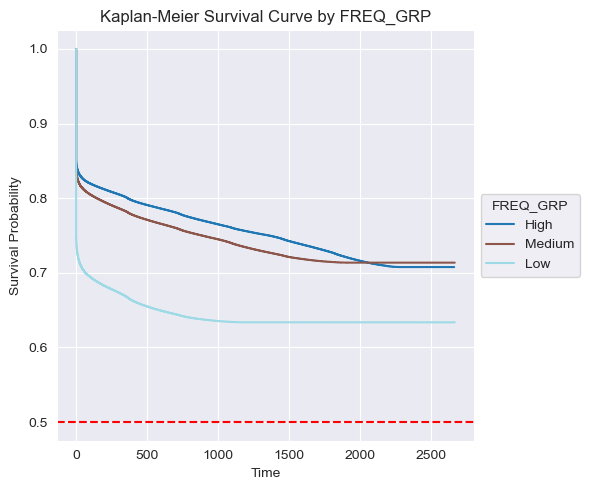

In [24]:
import matplotlib.cm as cm
categories = df['FREQ_GRP'].unique()
colors = cm.get_cmap('tab20', len(categories))
plt.figure(figsize=(8, 5))
for i, category in enumerate(categories):
    mask = df['FREQ_GRP'] == category
    kmf.fit(durations=df[mask]['tenure'], event_observed=df[mask]['churn'], label=category)
    kmf.plot_survival_function(ci_show=False, color=colors(i))
 # Thêm đường ngang ở mức 0.5
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Kaplan-Meier Survival Curve by FREQ_GRP')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='FREQ_GRP', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

In [ ]:
# for category in categories:
#     mask = df['FREQ_GRP'] == category
#     kmf.fit(durations=df[mask]['tenure'], event_observed=df[mask]['churn'])
#     print(f"Category: {category}")
#     print("\nMedian survival time:")
#     print(kmf.median_survival_time_)
#     print("\n")

PLOT KAPLAN MEIER BY DECILE_GRP

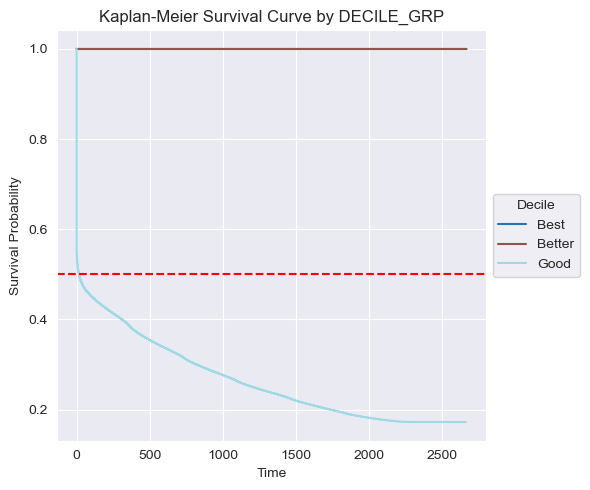

In [25]:
categories = df['DECILE_GRP'].unique()
colors = cm.get_cmap('tab20', len(categories))
plt.figure(figsize=(8, 5))
for i, category in enumerate(categories):
    mask = df['DECILE_GRP'] == category
    kmf.fit(durations=df[mask]['tenure'], event_observed=df[mask]['churn'], label=category)
    kmf.plot_survival_function(ci_show=False, color=colors(i))
 # Thêm đường ngang ở mức 0.5
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Kaplan-Meier Survival Curve by DECILE_GRP')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Decile', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

PLOT KAPLAN MEIER BY SEGMENT

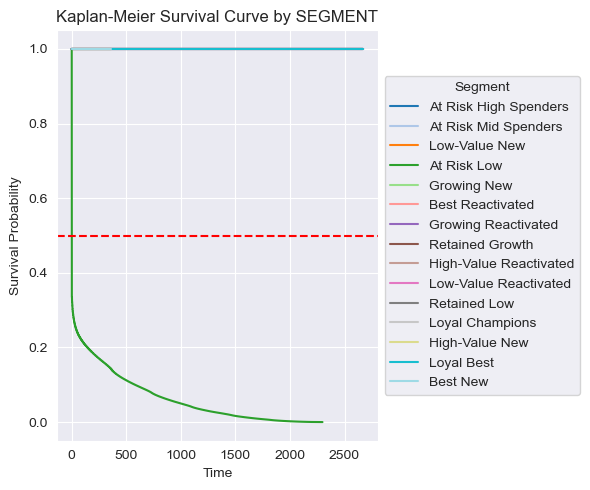

In [26]:
categories = df['SEGMENT'].unique()
colors = cm.get_cmap('tab20', len(categories))
plt.figure(figsize=(8, 5))
for i, category in enumerate(categories):
    mask = df['SEGMENT'] == category
    kmf.fit(durations=df[mask]['tenure'], event_observed=df[mask]['churn'], label=category)
    kmf.plot_survival_function(ci_show=False, color=colors(i))
 # Thêm đường ngang ở mức 0.5
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Kaplan-Meier Survival Curve by SEGMENT')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Segment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

## TRAIN TEST SPLIT

In [27]:
# Days_since_last_visit, frequency, moentary,LT_net_sales,LT_unit_cnt
q1=df['tenure'].quantile(0.25)
q3=df['tenure'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df['tenure']>=lower) &(df['tenure']<=upper)]
data=df.copy()
# Log transform các biến lệch nhiều
data['log_net_sales']=np.log1p(data['monetary'])
data['log_lt_net_sales']=np.log1p(data['LT_net_sales'])
data['log_unit_cnt']=np.log1p(data['TY_unit_cnt'])
data['log_lt_unit_cnt']=np.log1p(data['LT_unit_cnt'])
data['log_days_last_visit']=np.log1p(data['Days_since_last_visit'])
features=['log_net_sales', 'log_unit_cnt', 'log_lt_net_sales', 'log_lt_unit_cnt','log_days_last_visit','frequency']
# features=['log_days_last_visit','frequency']
# Chia train/test
train_df,test_df= train_test_split(data,
                                     test_size=0.2,
                                     random_state=42)
# STANDARDSCALER
train_df_scaled=train_df.copy()
test_df_scaled=test_df.copy()
sc=StandardScaler()
train_df_scaled[features]=pd.DataFrame(sc.fit_transform(train_df[features]),index=train_df.index)
test_df_scaled[features]=pd.DataFrame(sc.transform(test_df[features]),index=test_df.index)

In [28]:
train_df_scaled['tenure'].value_counts()

tenure
1       2538375
2         52418
3         32398
8         26958
4         24021
         ...   
2107         41
2665         33
2224         20
2670          5
2257          4
Name: count, Length: 2664, dtype: int64

In [30]:
train_df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
LT_net_sales,13761196.0,4.483128e+02,1060.829057,0.000000,69.080000,194.190000,502.820000,744134.450000
TY_net_sales,13761196.0,7.916110e+01,322.953463,0.000000,0.000000,0.000000,73.400000,259987.580000
LT_trans_cnt,13761196.0,6.321688e+00,15.011217,1.000000,1.000000,3.000000,7.000000,14183.000000
LT_pos_trans_cnt,13761196.0,5.552730e+00,13.112200,0.000000,1.000000,3.000000,6.000000,12389.000000
LT_unit_cnt,13761196.0,3.086292e+01,69.683414,0.000000,5.000000,13.000000,34.000000,47368.000000
LT_visits,13761196.0,5.467851e+00,8.933326,1.000000,1.000000,3.000000,6.000000,3408.000000
TY_trans_cnt,13761196.0,1.152450e+00,4.992454,0.000000,0.000000,0.000000,1.000000,4800.000000
TY_pos_trans_cnt,13761196.0,1.025132e+00,4.457091,0.000000,0.000000,0.000000,1.000000,4352.000000
TY_unit_cnt,13761196.0,5.811043e+00,21.886530,0.000000,0.000000,0.000000,6.000000,18558.000000
TY_visits,13761196.0,9.934135e-01,2.231458,0.000000,0.000000,0.000000,1.000000,337.000000


In [29]:
train_df_scaled.isnull().sum()

Cons_ID                  0
life_stage               0
FREQ_GRP                 0
DECILE_GRP               0
CLASSIC_RFM_SEGMENT      0
SEGMENT                  0
LT_net_sales             0
TY_net_sales             0
LT_trans_cnt             0
LT_pos_trans_cnt         0
LT_unit_cnt              0
LT_visits                0
TY_trans_cnt             0
TY_pos_trans_cnt         0
TY_unit_cnt              0
TY_visits                0
Days_since_last_visit    0
recency                  0
frequency                0
monetary                 0
tenure                   0
churn                    0
log_net_sales            0
log_lt_net_sales         0
log_unit_cnt             0
log_lt_unit_cnt          0
log_days_last_visit      0
dtype: int64

## 2. Cox Proportional Hazards Model (Semi-parametric Model)

Cox proportional hazards model is essentially a regression model commonly used in medical research for investigating the association between the survival time of patients and one or more covariates. The method mentioned above, Kaplan-Meier estimate is an example of univariate analysis. It describes the survival according to one factor under investigation, but ignore the impact of any others (patient covariates). Univariate analysis methods are only useful when the covariates are categorical (e.g.: males vs females). They don’t work easily for continuous covariates such as "age at diagnosis".

An alternative method to Kaplan-Meier estimate is the Cox proportional hazards model. It works for both continuous and categorical variables. Furthermore, the Cox proportional hazards model extends survival analysis methods to assess simultaneously the effect of several risk factors on survival time.

In [34]:
train_df_cox=train_df_scaled[features+['tenure','churn']]
test_df_cox=test_df_scaled[features+['tenure','churn']]
test_df_cox.columns

Index(['log_net_sales', 'log_unit_cnt', 'log_lt_net_sales', 'log_lt_unit_cnt',
       'log_days_last_visit', 'frequency', 'tenure', 'churn'],
      dtype='object')

In [35]:
# MÔ HÌNH COXPHFITTER
cph=CoxPHFitter()
cph.fit(train_df_cox,duration_col='tenure',event_col='churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1.37612e+07 total observations, 9.86815e+06 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 1.37612e+07
number of events observed = 3.89304e+06
   partial log-likelihood = -57901921.04
         time fit was run = 2025-05-12 03:34:15 UTC

---
                      coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                             
log_net_sales       -11.69      0.00     13.08          -37.33           13.94                0.00            1.14e+06
log_unit_cnt         -5.00      0.01     15.84          -36.05           26.05                0.00            2.05e+11
log_lt_net_sales     -0.51      0.60      0.00           -0.51           -0.51                0.60                0.60
log_lt_unit_cnt      -0.74      0.48      0.00           -0.75           -0.74                0.47                0.48
log_days_last_visit  -0.79      0.45      0.00           -0.80           -0.79                0.45                0.45
frequency             0.88      2.42      0.00            0.88            0.89                2.41                2.43

                     cmp to       z      p  -log2(p)
covariate                                           
log_net_sales          0.00   -0.89   0.37      1.43
log_unit_cnt           0.00   -0.32   0.75      0.41
log_lt_net_sales       0.00 -747.56 <0.005       inf
log_lt_unit_cnt        0.00 -713.45 <0.005       inf
log_days_last_visit    0.00 -230.50 <0.005       inf
frequency              0.00  335.06 <0.005       inf
---
Concordance = 0.95
Partial AIC = 115803854.09
log-likelihood ratio test = 10380766.33 on 6 df
-log2(p) of ll-ratio test = inf

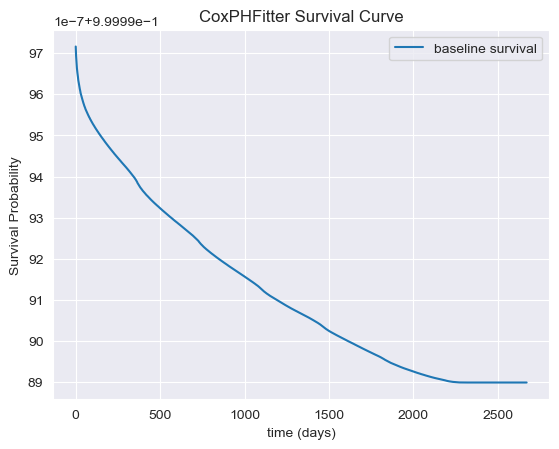

In [41]:
cph.baseline_survival_.plot()
plt.xlabel("Survival Probability")
plt.xlabel("time (days)")
plt.ylabel("Survival Probability")
plt.title("CoxPHFitter Survival Curve")
plt.show();

## RERUN WITH FEATURES HAVE P Value<0.005

In [42]:
# CHẠY LẠI VỚI FEATURES CÓ P Value<0.0005
new_features=['log_lt_net_sales', 'log_lt_unit_cnt','log_days_last_visit','frequency']
train_df_cox_new=train_df_scaled[new_features+['tenure','churn']]
test_df_cox_new=test_df_scaled[new_features+['tenure','churn']]
test_df_cox_new.columns

Index(['log_lt_net_sales', 'log_lt_unit_cnt', 'log_days_last_visit',
       'frequency', 'tenure', 'churn'],
      dtype='object')

In [43]:
# MÔ HÌNH COXPHFITTER
cph=CoxPHFitter()
cph.fit(train_df_cox_new,duration_col='tenure',event_col='churn')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1.37612e+07 total observations, 9.86815e+06 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
      baseline estimation = breslow
   number of observations = 1.37612e+07
number of events observed = 3.89304e+06
   partial log-likelihood = -58538578.82
         time fit was run = 2025-05-12 05:17:00 UTC

---
                     coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                            
log_lt_net_sales    -0.50      0.61      0.00           -0.50           -0.50                0.61                0.61
log_lt_unit_cnt     -0.77      0.46      0.00           -0.77           -0.76                0.46                0.47
log_days_last_visit  1.94      6.94      0.00            1.93            1.94                6.92                6.97
frequency           -0.73      0.48      0.00           -0.73           -0.73                0.48                0.48

                     cmp to       z      p  -log2(p)
covariate                                           
log_lt_net_sales       0.00 -718.84 <0.005       inf
log_lt_unit_cnt        0.00 -730.87 <0.005       inf
log_days_last_visit    0.00 1115.90 <0.005       inf
frequency              0.00 -480.19 <0.005       inf
---
Concordance = 0.94
Partial AIC = 117077165.64
log-likelihood ratio test = 9107450.78 on 4 df
-log2(p) of ll-ratio test = inf

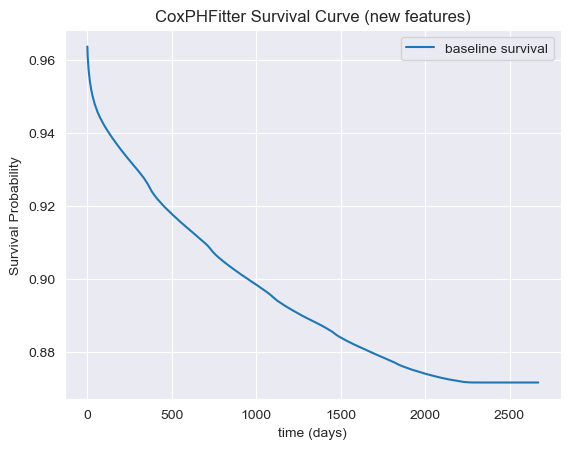

In [44]:
cph.baseline_survival_.plot()
plt.xlabel("Survival Probability")
plt.xlabel("time (days)")
plt.ylabel("Survival Probability")
plt.title("CoxPHFitter Survival Curve (new features)")
plt.show();

In [45]:
cph.baseline_survival_

,baseline survival
1.0,0.963702
2.0,0.962087
3.0,0.961050
4.0,0.960273
5.0,0.959605
...,...
2663.0,0.871567
2664.0,0.871567
2665.0,0.871567
2666.0,0.871567


In [46]:
survival_function = cph.predict_survival_function(test_df_scaled[:1000], times=np.arange(0,2700))
survival_function.T

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2690.0,2691.0,2692.0,2693.0,2694.0,2695.0,2696.0,2697.0,2698.0,2699.0
4395029,0.994173,0.994173,0.993910,0.993740,0.993613,0.993504,0.993401,0.993292,0.993159,0.993071,...,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508
10109693,0.953045,0.953045,0.950968,0.949634,0.948636,0.947777,0.946969,0.946112,0.945074,0.944379,...,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268
5077826,0.724087,0.724087,0.713560,0.706867,0.701893,0.697640,0.693655,0.689452,0.684392,0.681018,...,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099
1014727,0.891503,0.891503,0.886870,0.883902,0.881684,0.879780,0.877989,0.876093,0.873800,0.872265,...,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467
3101106,0.998848,0.998848,0.998796,0.998762,0.998737,0.998715,0.998695,0.998673,0.998647,0.998629,...,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479129,0.990962,0.990962,0.990554,0.990292,0.990095,0.989926,0.989766,0.989597,0.989392,0.989255,...,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809
15652863,0.959897,0.959897,0.958117,0.956973,0.956117,0.955380,0.954686,0.953951,0.953061,0.952464,...,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841
2235134,0.957917,0.957917,0.956050,0.954851,0.953954,0.953182,0.952455,0.951684,0.950751,0.950126,...,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271
8857583,0.769372,0.769372,0.760276,0.754480,0.750166,0.746472,0.743007,0.739349,0.734939,0.731996,...,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278


In [47]:
churn_threshold=0.5
def churn_time(df,threshold):
    churn_times=[]
    for index, row in df.iterrows():
        churn_time=None
        for col in df.columns:
            if col!='Cons_ID' and row[col]<threshold:
                churn_time=col
                break
        churn_times.append(churn_time)
    df['churn_time']=churn_times
    return df
survival_result=churn_time(survival_function.T,churn_threshold)
survival_result['churn_time']

4395029       NaN
10109693      NaN
5077826     387.0
1014727       NaN
3101106       NaN
            ...  
1479129       NaN
15652863      NaN
2235134       NaN
8857583     755.0
4371347       NaN
Name: churn_time, Length: 1000, dtype: float64

In [48]:
# DỰ BÁO và ĐÁNH GIÁ
train_df_cox_new['predict_hazard']=cph.predict_partial_hazard(train_df_cox_new[new_features])
c_index_train=concordance_index(train_df_cox_new['tenure']-train_df_cox_new['predict_hazard'],train_df_cox_new['churn'])
print(f"Train C Index:{c_index_train:.3f}")
# Test Prediction
test_df_cox_new['predict_hazard']=cph.predict_partial_hazard(test_df_cox_new[new_features])
c_index_test=concordance_index(test_df_cox_new['tenure']-test_df_cox_new['predict_hazard'],test_df_cox_new['churn'])
print(f"Test C Index:{c_index_test:.3f}")

Train C Index:0.321
Test C Index:0.321


In [49]:
survival_result

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2691.0,2692.0,2693.0,2694.0,2695.0,2696.0,2697.0,2698.0,2699.0,churn_time
4395029,0.994173,0.994173,0.993910,0.993740,0.993613,0.993504,0.993401,0.993292,0.993159,0.993071,...,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,0.978508,NaN
10109693,0.953045,0.953045,0.950968,0.949634,0.948636,0.947777,0.946969,0.946112,0.945074,0.944379,...,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,0.836268,NaN
5077826,0.724087,0.724087,0.713560,0.706867,0.701893,0.697640,0.693655,0.689452,0.684392,0.681018,...,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,0.301099,387.0
1014727,0.891503,0.891503,0.886870,0.883902,0.881684,0.879780,0.877989,0.876093,0.873800,0.872265,...,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,0.652467,NaN
3101106,0.998848,0.998848,0.998796,0.998762,0.998737,0.998715,0.998695,0.998673,0.998647,0.998629,...,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,0.995724,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479129,0.990962,0.990962,0.990554,0.990292,0.990095,0.989926,0.989766,0.989597,0.989392,0.989255,...,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,0.966809,NaN
15652863,0.959897,0.959897,0.958117,0.956973,0.956117,0.955380,0.954686,0.953951,0.953061,0.952464,...,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,0.858841,NaN
2235134,0.957917,0.957917,0.956050,0.954851,0.953954,0.953182,0.952455,0.951684,0.950751,0.950126,...,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,0.852271,NaN
8857583,0.769372,0.769372,0.760276,0.754480,0.750166,0.746472,0.743007,0.739349,0.734939,0.731996,...,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,0.377278,755.0


In [56]:
train_df_cox_new['log_days_last_visit'].value_counts()

log_days_last_visit
-1.261361    66879
-1.192483    65611
-1.273529    62722
-1.365209    61820
-1.119856    57040
             ...  
 1.416471       27
 1.129214       25
 1.416996       14
 1.416733        9
-1.249400        2
Name: count, Length: 2643, dtype: int64

In [50]:
# # Định nghĩa lại hàm reserve_transform
# def reserve_transform(values, sc):
#     values = sc.inverse_transform(values.reshape(-1, 1)).flatten()
#     values = np.expm1(values)
#     return values
# # Gọi hàm reserve_transform với log_values
# log_values = np.array([-1.5, -0.5, 0.5, 1.5])
# real_values = reserve_transform(log_values, sc)
# print(real_values)

<Figure size 6000x500 with 0 Axes>

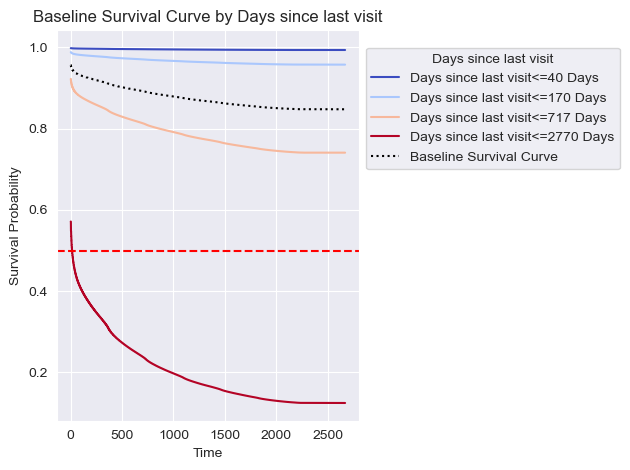

In [83]:
plt.figure(figsize=(60, 5))
cph.plot_partial_effects_on_outcome(covariates='log_days_last_visit',values=log_values,cmap='coolwarm')
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Baseline Survival Curve by Days since last visit')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
legend_labels=['Days since last visit<=40 Days','Days since last visit<=170 Days','Days since last visit<=717 Days','Days since last visit<=2770 Days','Baseline Survival Curve']
plt.legend(title='Days since last visit', loc='center left', bbox_to_anchor=(1, 0.8),labels=legend_labels)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show();

# Comment
+ Khách hàng có days since last visit thấp có xác suất không churn rất cáo- đường cong survival curve gần như nằm ngang ở  mức gần 1
+ Khách hàng lâu quay lại có xác suất sống sót giảm dần, đặc biệt là nhóm cuối có survival probability tụt xuống dưới 0.2 sau hơn 1000 ngày 
+ Median survival time của nhóm khách hàng lâu không quay lại này ngắn nhất, có khả năng churn cao nhất và nhanh nhất

In [ ]:
print(f"Mean Time to Churn is :{cph.predict_expectation(train_df_cox_new)}")
print(f"Median Time to Churn is :{cph.predict_median(train_df_cox_new)}")

In [ ]:
colors = cm.get_cmap('tab20', len(categories))
plt.figure(figsize=(8, 5))
segments=train_df_scaled['Segment'].unique()
for segment in segments:
    segment_df=train_df_scaled[train_df_scaled['Segment']==segment]
    segment_df_cox=segment_df[new_features+['tenure','churn']]
    cph.fit(segment_df_cox,duration_col='tenure',event_col='churn')
    cph.baseline_survival.plot(lable=f'Segment {segment}')
 # Thêm đường ngang ở mức 0.5
plt.axhline(y=0.5, color='red', linestyle='--')
plt.title('Baseline Survival Curve by SEGMENT')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend(title='Segment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

In [ ]:
# RandomSurvivalForest Model

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sksurv.ensemble import RandomSurvivalForest
# from sksurv.metrics import concordance_index_censored
# from sksurv.util import Surv

# # Giả sử bạn đã có DataFrame df
# # Cột 'tenure' là thời gian sống (duration)
# # Cột 'churn' là biến sự kiện (1 = churn, 0 = alive)
# # Đã log-transform các biến numerical như 'log_net_sales', 'log_unit_cnt', 'log_days_last_visit'

# # Tạo biến target theo định dạng required bởi scikit-survival
# y = Surv.from_dataframe("churn", "tenure", X)

# # Chọn feature để huấn luyện
# data_ = X[['log_net_sales', 'log_unit_cnt', 'log_days_last_visit', 'frequency']]

# # Chuẩn hóa dữ  liệu
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data_)

# # Chia train-test
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Khởi tạo và huấn luyện Random Survival Forest
# rsf = RandomSurvivalForest(n_estimators=100, min_samples_split=10,
#                            min_samples_leaf=15, max_features="sqrt",
#                            n_jobs=-1, random_state=42)
# rsf.fit(X_train, y_train)

# # Đánh giá mô hình trên tập test
# c_index = rsf.score(X_test, y_test)
# print(f"C-index trên test set: {c_index:.4f}")

In [73]:
test=train_df_scaled[['log_days_last_visit','Days_since_last_visit']]
test[test['log_days_last_visit']<=-1.5].describe().T

,count,mean,std,min,25%,50%,75%,max
log_days_last_visit,1075344.0,-2.141466,0.643334,-4.102432,-2.424637,-1.908543,-1.655943,-1.504064
Days_since_last_visit,1075344.0,20.849258,12.173756,0.000000,10.000000,22.000000,32.000000,40.000000
